# 1. クラスタリングとは
クラスタリングは 教師なし学習 に属する分析手法である。

クラスタリングの目標は、データを自然なグループにまとめる方法を見つけ出すことである。つまり、正しい答えが事前にわかっていないデータから隠れた構造を見つけ出す。

クラスタリングには色々な手法があり、どの手法が最適かはクラスタリングを行いたいデータセットに依存する。

### クラスタリングの種類
https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

上記サイトにあるように色々な手法が存在し、データセットによってどのクラスタリングが最適化は異なる

# 2.階層型クラスタリングとは
データセットのサンプルを順番にクラスタにしていく方法で、途中過程が階層のように表せ、最終的に樹形図（デンドログラム）として表すことができる。ここで「順番にクラスタにしていく方法」として主に下記の方法がある。

・単連結法(single linkage)  
最も近いメンバー同士の距離が最少となる2つのクラスタをマージする

・完全連結法(complete linkage)  
最も遠いメンバー同士の距離が最少となる2つのクラスタをマージする

・群平均法(average linkage)  
メンバー同士の全ての組み合わせの距離の平均が最少となる2つのクラスタをマージする

・ウォード連結法(Ward's linkage)  
クラスタ内誤差平方和の合計の増加量が最少となる2つのクラスタをマージする
ここで、クラスタ内誤差平方和とはクラスターの重心から各クラスターメンバーへの距離の総和を全クラスタで足し合わせたものである。

### メリット
あらかじめクラスタ数を決める必要がない
結果として出力される樹形図から、分類の過程でできるクラスターがどのように結合されていくかを一つひとつ確認できる
樹形図を用いて後からクラスタ数を決めることができる

### デメリット
分類の対象が非常に多い場合、計算量が多くなり実行が困難になったり、樹形図が巨大になり結果が不明瞭になったりする。都道府県の例でも結構多い。

![都道府県の分類](https://www.albert2005.co.jp/knowledge/images/tech_mining_img106.jpg)

### 階層型クラスタリングの実装

In [11]:
# 必要なパッケージをimport
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

In [3]:
# ランダム値で適当なデータセットを作成する
np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [6]:
# 5つの要素のユーグリッド距離を計算
# pdistで生成された配列を距離行列に変換
# DataFrame型に変換
# euclideadn：ユーグリッド距離
# minkowski：ミンコフスキー距離
# cityblock：マンハッタン距離      etc...
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,
                        index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [7]:
# データのarray型
df.values

array([[6.96469186, 2.86139335, 2.26851454],
       [5.51314769, 7.1946897 , 4.2310646 ],
       [9.80764198, 6.84829739, 4.80931901],
       [3.92117518, 3.43178016, 7.29049707],
       [4.38572245, 0.59677897, 3.98044255]])

In [8]:
# methodに○○法、metricに使用する距離を指定
# linkage：クラスタリングを実行するメソッド
row_clusters = linkage(df.values, method='complete', metric='euclidean')

In [9]:
# クラスタリングの結果を可視化
# row_label：マージしたデータのラベル番号(0 + 4→5)
# distance：マージしたデータ同士の距離
# no. of items in clust.：クラスタ内のアイテム数
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


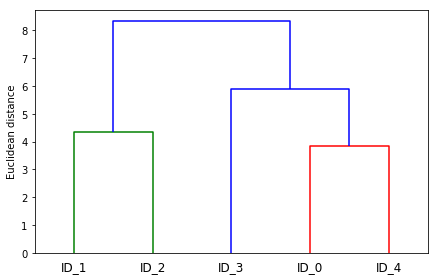

In [12]:
# row_clustersの結果を用いてデンドログラムを描いてみる
# ID_0とID_4でcluster1
# ID_0とID_4 ->ID_5となり、ID_3とID_5でcluster3
row_dendr = dendrogram(row_clusters,
                       labels=labels,
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

# 3.非階層型クラスタリング
階層クラスター分析と異なり、階層的な構造を持たず、あらかじめいくつのクラスターに分けるかを決め、決めた数のクラスタにサンプルを分割する方法。

階層クラスター分析と違い、サンプル数が大きいビッグデータを分析するときに適している。

ただし、あらかじめいくつのクラスターに分けるかは、分析者が決める必要があり、最適クラスター数を自動的には計算する方法は確立されていない。(エルボー法やシルエットプロット図とかはあるけども....)

### Kmeans法
kをあらかじめパラメータとして決めておく。

クラスター重心をクラスターの代表点とし、クラスタ内誤差平方和を最小化するようにk個のクラスタを決める手法。

下記リンクが詳しい
https://www.albert2005.co.jp/knowledge/data_mining/cluster/non-hierarchical_clustering

### Kmeans法の実装

In [13]:
# import
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [14]:
# テストデータセットの用意
# n_samples	サンプル数
# n_features	特徴量の数
# centers	中心の個数（塊数）
# cluster_std	クラスタの標準偏差
X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=5, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

In [15]:
# 特徴量
X

array([[ 2.11872357,  1.09865834],
       [-1.31469606,  7.68656458],
       [-1.03512641,  8.17391403],
       [-0.5010135 ,  6.8004675 ],
       [ 8.95921143, -2.57168318],
       [ 0.96217896,  4.51795326],
       [ 2.15940501,  1.38598318],
       [ 2.4198128 ,  0.96215512],
       [ 0.5323772 ,  3.31338909],
       [ 0.78260667,  4.15263595],
       [ 0.4519936 ,  3.59377836],
       [ 0.16932115,  4.19741719],
       [ 1.04829186,  5.03092408],
       [ 1.40848818,  3.93270482],
       [ 1.59141542,  4.90497725],
       [-1.10829348,  7.78638482],
       [-1.77592024,  3.88264829],
       [ 2.20438661,  1.56085661],
       [ 9.11781212, -2.28246954],
       [10.25121136, -2.13612296],
       [-1.82634699,  8.22605907],
       [ 1.06498315,  4.10289686],
       [ 0.99914934,  4.2101954 ],
       [-1.17000251,  7.95155053],
       [ 9.60644675, -2.56152952],
       [-1.21428829,  2.11685343],
       [-0.67208999,  8.37526931],
       [ 1.51989121,  1.42488952],
       [ 9.53378765,

In [16]:
# 中心の個数（塊数）のうちどこに所属するか
y

array([1, 3, 3, 3, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 2, 1, 4, 4, 3, 0,
       0, 3, 4, 2, 3, 1, 4, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 1, 0, 1, 0,
       0, 4, 4, 2, 0, 3, 4, 3, 0, 4, 3, 2, 4, 2, 0, 2, 3, 1, 4, 4, 4, 4,
       1, 3, 2, 4, 2, 2, 1, 4, 4, 4, 1, 4, 4, 0, 2, 1, 1, 0, 3, 0, 1, 3,
       1, 1, 4, 1, 1, 3, 3, 0, 3, 2, 4, 0, 0, 1, 2, 2, 4, 4, 2, 3, 1, 0,
       2, 1, 1, 1, 4, 1, 2, 2, 2, 2, 1, 2, 3, 0, 4, 0, 0, 1, 3, 0, 0, 1,
       2, 2, 3, 2, 3, 4, 3, 3, 3, 2, 4, 3, 0, 4, 2, 2, 0, 1])

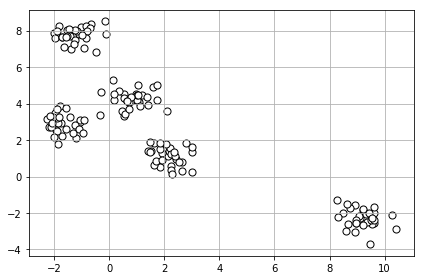

In [17]:
# 図示
plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
plt.show()

In [19]:
# クラスタリングの実施
# 5つの塊をあえて3つのクラスタで分けてみる
km = KMeans(n_clusters=3, 
            init='random',
            # init='k-means++',            
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=3)

y_km = km.fit_predict(X)

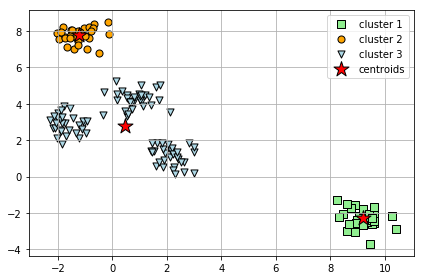

In [20]:
# plot
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

# 密度ベースクラスタリング
サンプルの局所的な密度に基づいてクラスタラベルを割り当てる手法。

あらかじめクラスタ数を決める必要はない。また、ノイズをノイズとして認識することが可能。

ここでは DBSCAN(Density-based Spatial Clustering of Applications with Noise) アルゴリズムを取り上げる

### 密度ベースクラスタリングの実装

In [21]:
# import
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

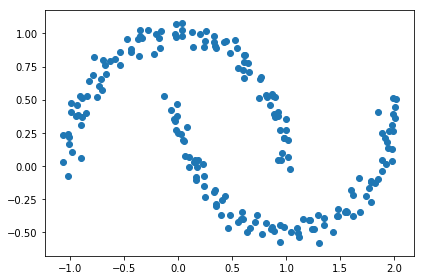

In [22]:
# 三日月型に密集しているデータセットを作成
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
plt.show()

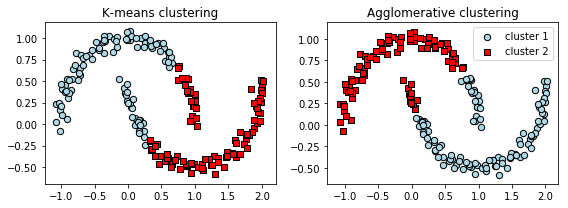

In [23]:
# このデータをK-meansと完全連結法でクラスタリングしてみると上手く分割できない
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
plt.show()

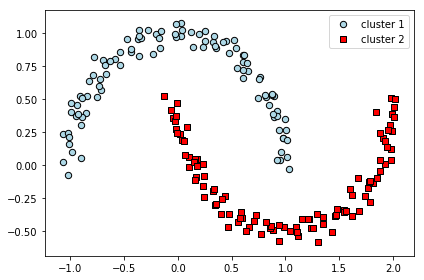

In [25]:
# DBSCANでクラスタリングをしてみると....？
# キレイに出力できました.....!
# eps：周りの点を探すための半径
# min-sample：クラスタとみなすための最小の点の集合数
db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.legend()
plt.tight_layout()
plt.show()